In [1]:
import scipy.io
import utils
import torch
import numpy as np
import TWIST
import visualize as vis

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Load data

In [2]:
data_path = '../data/NC_m4_np1_df0.5_32x32x1.mat'

m = 4 # no of patterns
nump = 1 # no of detected planes
df = 0.5 # downsampling factor
nx = 32 # width of a plane (dy = 1/3 um)
ny = 32 # height of a plane (dx = 1/3 um)
nz = 1 # number of planes (dz = 1 um)

data = scipy.io.loadmat(data_path)

FM = data['A']
X = data['X_original'].T
y_clean = data['Y'].T
y_noisy = data['Yn'].T

Visualize measurement matrix A

In [3]:
# vis.visualize_A(FM, nx, ny, nz, nump, m, df, figsize=(6, 6))

In [4]:
# vis.visualize_A(np.log(FM), nx, ny, nz, nump, m, df, figsize=(6, 6))

Visualize object X

In [5]:
# vis.visualize_X(X, nx, ny, nz, figsize=(15, 15), planes_to_plot=range(nz))

Visualize measurement y

In [6]:
# clean measurements
# vis.visualize_y(y_clean, nx, ny, df, m, nump, figsize=(15, 15))

In [7]:
# noisy measurements
# vis.visualize_y(y_noisy, nx, ny, df, m, nump, figsize=(15, 8))

Run twist

In [21]:
y = y_noisy # observed data

# absAty = np.abs(utils.AT(y, FM, nx, ny, nz))
# tau = 1e-7*np.max(absAty) # Regularization parameter
tau = 10 # Regularization parameter
Psi = 'SOFT_DWT' # denoising function ('TV', 'SOFT', 'SOFT_DWT')
Phi = 'L1_DWT' # regularization function ('TV', 'L1', 'L1_DWT')
lam1 = 1e-4 # twist parameter
stop_criterion = 1 # 0:non-zero components, 1:change in obj func, 2:estimate, 3:value of obj func 
tolA = 1e-3 # Stopping threshold
init = 0 # 0:zero, 1:random, 2:Aty, 3:init_x given by user
init_x = None # initial estimate

x_twist, dummy, obj_twist, times_twist, dummy, mse_twist, dummy = TWIST.TwIST(y, FM, tau, nx, ny, nz,
                                                                                Psi=Psi, Phi=Phi,
                                                                                lam1=1e-4, alpha=0, beta=0,
                                                                                stop_criterion=stop_criterion, tolA=tolA,
                                                                                init=init, init_x=init_x,
                                                                                enforceMonotone=1,
                                                                                true_x=X, compute_mse=1,
                                                                                verbose=1)


Initial objective = 4212677.5, nonzeros = 0
Incrementing S = 2
Incrementing S = 4
Incrementing S = 8
Incrementing S = 16
Incrementing S = 32
Incrementing S = 64
Incrementing S = 128
Incrementing S = 256
Incrementing S = 512
Incrementing S = 1024
Incrementing S = 2048
Incrementing S = 4096
Incrementing S = 8192
Incrementing S = 16384
Incrementing S = 32768
Incrementing S = 65536
Incrementing S = 131072
Iteration = 2, objective = 817420.0298857972, nz = 1024, criterion = 805.9618781912935
Iteration = 3, objective = 390657.02089563943, nz = 1024, criterion = 522.0853335949956
Iteration = 4, objective = 257608.25048479636, nz = 1024, criterion = 340.576933970901
Iteration = 5, objective = 197824.94312246243, nz = 1024, criterion = 232.0706237080021
Iteration = 6, objective = 164711.66946544324, nz = 1024, criterion = 167.3867467588281
Iteration = 7, objective = 143452.13074977082, nz = 1024, criterion = 129.07123572159955
Iteration = 8, objective = 128179.85495702417, nz = 1024, criterion

In [22]:
# vis.obj_mse_twist(obj_twist, times_twist, mse_twist, figsize=(12, 5))

lstsq reconstruction

In [23]:
y_torch = torch.from_numpy(y) 
FM_torch = torch.from_numpy(FM) 
x_lstsq = torch.linalg.lstsq(FM_torch, y_torch).solution  

lstq results

In [24]:
# vis.comparison2(X, x_lstsq, nx, ny, nz, figsize=(15, 6), planes_to_plot=range(0,nz,1))

twist results

In [25]:
# vis.comparison2(X, x_twist, nx, ny, nz, figsize=(15, 8), planes_to_plot=range(1,nz,2))

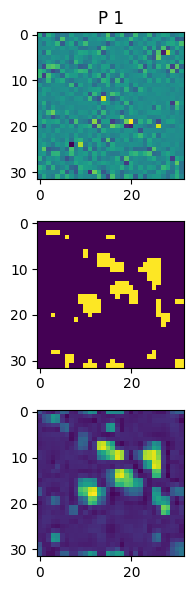

In [26]:
vis.comparison3(x_lstsq, X, x_twist, nx, ny, nz, figsize=(15, 6), planes_to_plot=range(0,nz,1))